## EDA ?

is a data analysis approach that uses several techniques mostly graphs 
- maximize insights 
- getting important features 
- observe questions 
- uncover the underlying structure

90 % of the data science project circle => collecting data , cleaning data EDA

## EDA checklist :
- what is the question u are trying to solve?
- what data u have and how to treat different types ?
- what did u get after drawing the graph?
- what is your observation 

## our Steps :
- problem 
- basic data exploration 
- vizuals 
- insights 

### problem 
 predict if the person has diabetes or not


In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
 df= pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,patient_no,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,1,35,0,33.6,0.627,50,1
1,1,85,66,2,29,0,26.6,0.351,31,0
2,8,183,64,3,0,0,23.3,0.672,32,1
3,1,89,66,4,23,94,28.1,0.167,21,0
4,0,137,40,5,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 10)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'patient_no',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

In [6]:
for col in df.columns :
    print(f'{col} : \n\n {df[col].unique()} ')

Pregnancies : 

 [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14] 
Glucose : 

 [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190] 
BloodPressure : 

 [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114] 
patient_no : 

 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   patient_no                768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
patient_no,768.0,384.500000,221.846794,1.000,192.75000,384.5000,576.25000,768.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,patient_no,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
272,3,122,78,273,0,0,23.0,0.254,40,0
467,0,97,64,468,36,100,36.8,0.600,25,0
698,4,127,88,699,11,155,34.5,0.598,28,0
153,1,153,82,154,42,485,40.6,0.687,23,0
439,6,107,88,440,0,0,36.8,0.727,31,0


In [10]:
# drop patient_no 

df = df.drop(['patient_no'], axis =1)

In [11]:
df.shape

(768, 9)

In [12]:
# drop NaN values 
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
# drop duplicates if there were any 
# df.drop_duplicates(inplace =True)

In [15]:
# repalce nan values with 0 into cols 
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols :
    df[col].replace(0, np.nan, inplace = True)

In [16]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [17]:
 #We can fill in NaN values with a median according to the target
for col in df.columns:
    df.loc[(df["Outcome"]==0) & (df[col].isnull()),col] = df.loc[(df["Outcome"]==0), col].median()
    df.loc[(df["Outcome"]==1) & (df[col].isnull()),col] = df.loc[(df["Outcome"]==1), col].median()

In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

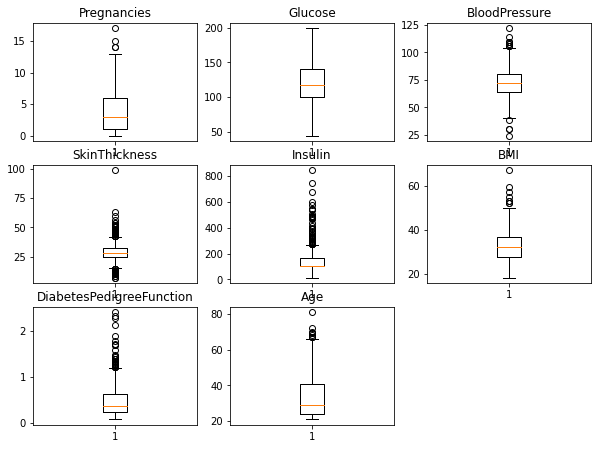

In [19]:
# outliers
plt.figure(figsize= (10,10))  # iteratores and count of iterators enumerate(iterable, start=0)

for i , col  in enumerate(df.drop(columns=['Outcome']).columns):
    plt.subplot(4,3,i+1) #subplot(nrows, ncols, index, **kwargs
    plt.boxplot(df[col])
    plt.title(col)

In [20]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [21]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
    print(variable, "no")

In [22]:
for col in df.columns:
    has_outliers(df, col)

Pregnancies no
Glucose no
BloodPressure no
SkinThickness yes
SkinThickness no
Insulin yes
Insulin no
BMI no
DiabetesPedigreeFunction yes
DiabetesPedigreeFunction no
Age no
Outcome no


In [23]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [25]:
replace_with_thresholds(df, df.columns)

In [26]:
for col in df.columns:
    has_outliers(df, col)

Pregnancies no
Glucose no
BloodPressure no
SkinThickness no
Insulin no
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


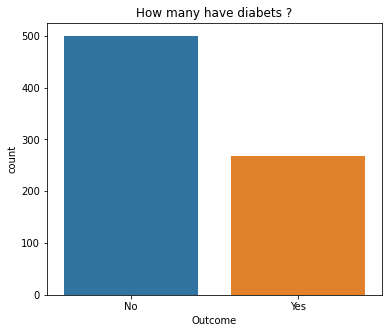

In [43]:
# how many have diabets ?

plt.figure(figsize=(6,5))
sns.countplot(df['Outcome'])
plt.xticks([0,1],['No','Yes'])
plt.title('How many have diabets ?')
plt.show()

In [37]:
df['Outcome'].value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

In [41]:
prop = df['Outcome'].value_counts() * 100  / len(df)

<AxesSubplot:ylabel='Outcome'>

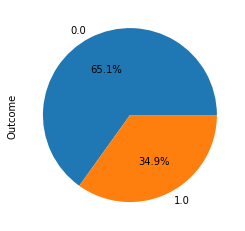

In [42]:
prop.plot.pie(autopct = '%1.1f%%')

In [44]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

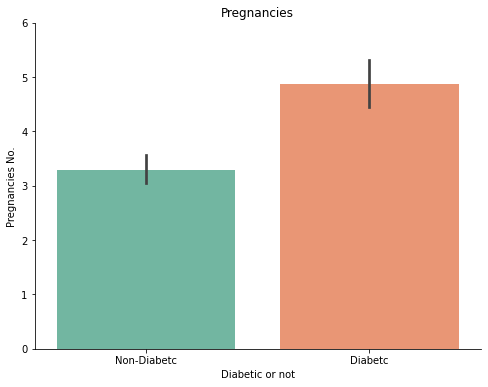

In [57]:
#Pregnancies WRT Outcome

plt.figure(figsize=(8,6))
sns.barplot(x='Outcome', y='Pregnancies', data = df, palette='Set2')
plt.xticks([0,1],['Non-Diabetc', 'Diabetc'])
plt.ylim(0,6)
plt.xlabel('Diabetic or not')
plt.ylabel('Pregnancies No.')
plt.title("Pregnancies")
ax=plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False) # An axis spine -- the line noting the data area boundaries.
ax.spines['right'].set_visible(False) # Set the artist's visibility.


 
plt.show()

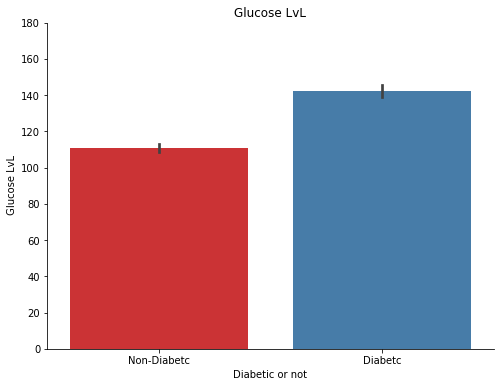

In [61]:
#Gluscose Lvl WRT Outcome

plt.figure(figsize=(8,6))
sns.barplot(x='Outcome', y='Glucose', data = df, palette='Set1')
plt.xticks([0,1],['Non-Diabetc', 'Diabetc'])
plt.ylim(0,180)
plt.xlabel('Diabetic or not')
plt.ylabel(' Glucose LvL')
plt.title("Glucose LvL")
ax=plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False) # An axis spine -- the line noting the data area boundaries.
ax.spines['right'].set_visible(False) # Set the artist's visibility.


 
plt.show()

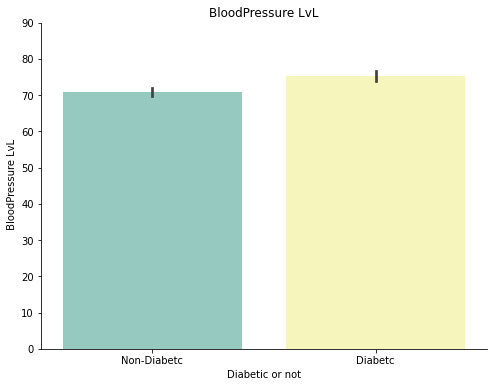

In [66]:
#BloodPressure lvl WRT Outcome

plt.figure(figsize=(8,6))
sns.barplot(x='Outcome', y='BloodPressure', data = df, palette='Set3')
plt.xticks([0,1],['Non-Diabetc', 'Diabetc'])
plt.ylim(0,90)
plt.xlabel('Diabetic or not')
plt.ylabel(' BloodPressure LvL')
plt.title("BloodPressure LvL")
ax=plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False) # An axis spine -- the line noting the data area boundaries.
ax.spines['right'].set_visible(False) # Set the artist's visibility.


 
plt.show()

In [63]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

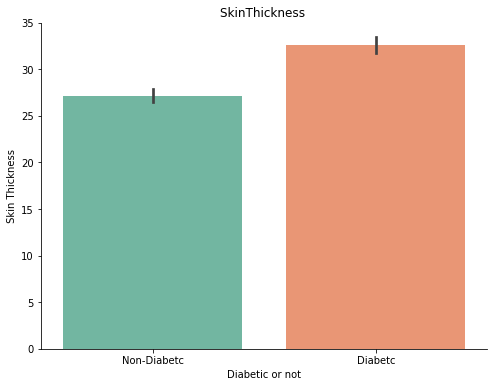

In [71]:
#BloodPressure lvl WRT Skin

plt.figure(figsize=(8,6))
sns.barplot(x='Outcome', y='SkinThickness', data = df, palette='Set2')
plt.xticks([0,1],['Non-Diabetc', 'Diabetc'])
plt.ylim(0,35)
plt.xlabel('Diabetic or not')
plt.ylabel(' Skin Thickness ')
plt.title("SkinThickness ")
ax=plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False) # An axis spine -- the line noting the data area boundaries.
ax.spines['right'].set_visible(False) # Set the artist's visibility.


 
plt.show()

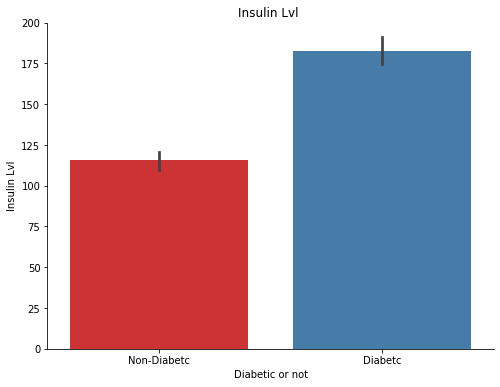

In [76]:
#BloodPressure lvl WRT insulin

plt.figure(figsize=(8,6))
sns.barplot(x='Outcome', y='Insulin', data = df, palette='Set1')
plt.xticks([0,1],['Non-Diabetc', 'Diabetc'])
plt.ylim(0,200)
plt.xlabel('Diabetic or not')
plt.ylabel('Insulin Lvl')
plt.title("Insulin Lvl ")
ax=plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False) # An axis spine -- the line noting the data area boundaries.
ax.spines['right'].set_visible(False) # Set the artist's visibility.


 
plt.show()

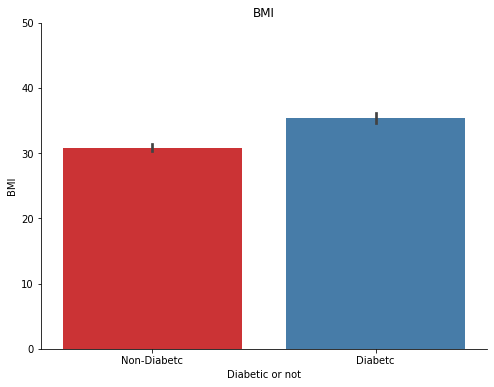

In [78]:
#BloodPressure lvl WRT bmi

plt.figure(figsize=(8,6))
sns.barplot(x='Outcome', y='BMI', data = df, palette='Set1')
plt.xticks([0,1],['Non-Diabetc', 'Diabetc'])
plt.ylim(0,50)
plt.xlabel('Diabetic or not')
plt.ylabel('BMI')
plt.title("BMI")
ax=plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False) # An axis spine -- the line noting the data area boundaries.
ax.spines['right'].set_visible(False) # Set the artist's visibility.


 
plt.show()

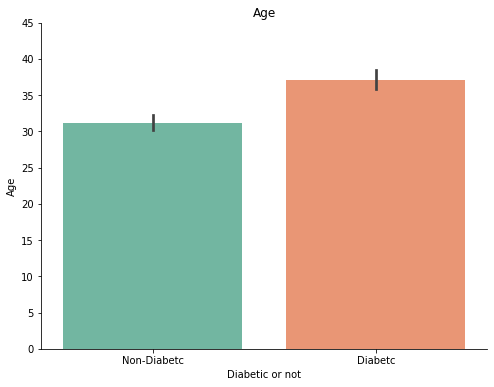

In [81]:
#BloodPressure lvl WRT age

plt.figure(figsize=(8,6))
sns.barplot(x='Outcome', y='Age', data = df, palette='Set2')
plt.xticks([0,1],['Non-Diabetc', 'Diabetc'])
plt.ylim(0,45)
plt.xlabel('Diabetic or not')
plt.ylabel('Age')
plt.title("Age")
ax=plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False) # An axis spine -- the line noting the data area boundaries.
ax.spines['right'].set_visible(False) # Set the artist's visibility.


 
plt.show()